Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale flat prices based on registration date from Jan-2017 onwards.csv...
Combined dataset shape: (948962, 11)
Features shape: (94896

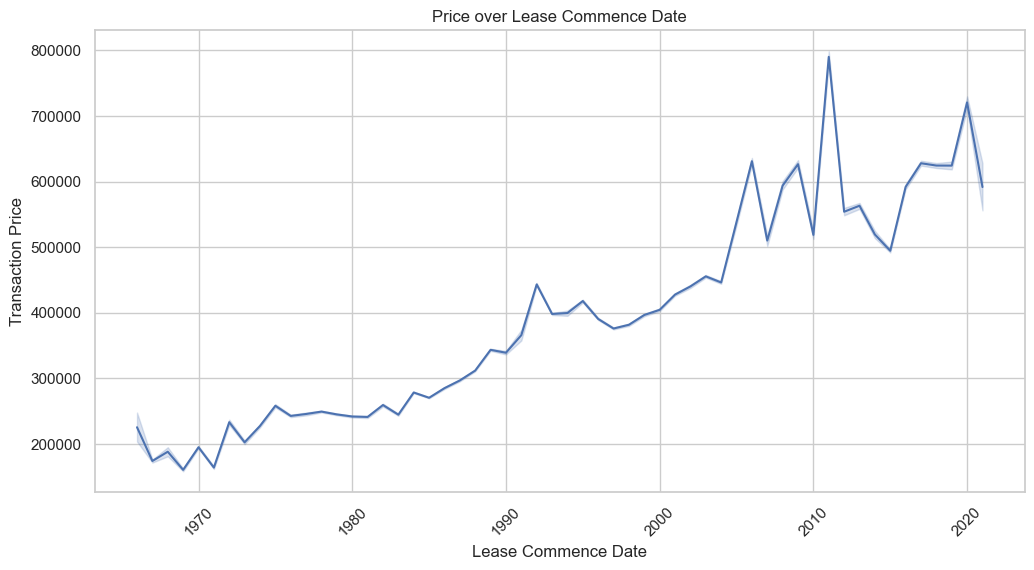

In [1]:
# Analysis of correlation between number of transactions and price

from lib.utils import load_all_resale_data, get_cleaned_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data with transaction date features
X, y = load_all_resale_data(include_features=['lease_commence_date', 'month'])
X, y = get_cleaned_data(X, y)

# Create a DataFrame
df = X
df['price'] = y
df["transaction_year"] = pd.to_datetime(df["month"]).dt.year
df["flat_age"] = X["transaction_year"] - X["lease_commence_date"]

# show lease commence date in relation to price 
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=df, x='lease_commence_date', y='price')
plt.title('Price over Lease Commence Date')
plt.xlabel('Lease Commence Date')
plt.ylabel('Transaction Price')
plt.xticks(rotation=45)
plt.show()



We observe a clear ordinal relationship among the different flat types. 
We map the 1 - 5 Room types to their number of rooms, "MULTI GENERATION" to 5, and"EXECUTIVE" and "MULTI-GENERATION" to 6, 
allowing us to take advantage of the ordinal feature of this categorical field. 
Additionally, there exists a non-trivial difference in the prices for the 
multi generation and multi-generation types, so we encode them as separate categories.